# Machine Learning - Singular Value Decomposition (SVD)

Author: Chetana Iyer

This notebook provides basic applications of singular value decomposition or SVD in Python, following HW2 in EE 399A, Introduction to Machine Learning for Science and Engineering, a UW course designed by J. Nathan Kutz for Spring 2023.

## Abstract: 
In this assignment, we will analyze a sample image dataset of faces of different people taken under various conditions of lighting. Our goal is to find the images with the most and least correlation based off computing the covariance matrix. We will also experiment with different ways to calculate this.Through these exercises, we aim to gain a deeper understanding of the underlying similarities across these different approaches for machine learning

## 1. Introduction

We will begin by computing the correlation matrix C, by computing the dot product or correlation between the first 100 images of the matrix X - which corresponds to the first 100 columns of the matrix, and visualize the correlation matrix. This will give us a visual representation of the correlations between the iamges. Next, we will find which two images are the most and least correlated and plot those images accordingly. This will allow us to visualize how similar and dissimilar the most/least correlated images are respectively. Next we will repeat this for a given set of 10 images to quantify and visualize the correlations. 

In addition to finding the correlation between different images, we will also experiment with understanding how taking the SVD of the covariance matrix provides a way of decomposing the covariance matrix into its eigenvectors and eigenvalues which represent the principal components and respective variance of the data and compare it with the approach of directly computing the eigenvalues and vectors from the matrix

Through this assignment, we aim to gain a deeper understanding of how SVD works and how it simplifies and streamlines multiple steps in the data analysis pipeline


how the SVD of the covariance matrix provides a way of decomposing the covariance matrix into its eigenvectors and eigenvalues which can be used for various applications in data analysis. More specifically, the eigenvectors of the covariance matrix represent the principal components of the data, which are the directions where the data varies the most. The eigenvaleus quantify the amount of variance represented by each principal component. 


## 2. Theoretical Background

One of the key concepts that underlies this assignment is the concept of **Singular Value Decomposition**. Singular Value Decomposition is known as one of the Most important matrix factorizations, but in the context of this assignment is used to break down high dimensional data into its most statistically descriptive factors. 

Another important concept is the **correlation matrix**. The correlation matrix is matrix of a given size where each element represents the covariance two variables from the given subset. Graphing it visualizes the correlation between the two variables, with darker colors indicating higher correlation and lighter colors indicating a lower correlation

The SVD works by factoring down an input X into three matrices: U,S and V^T which represent a decomposition of the matrix X. U captures the correlations between the rows of X, while V captures the correlations between the columns of the covariance matrix, X. 

The SVD of the covariance matrix provides a way of decomposing the covariance matrix into its eigenvectors and eigenvalues which can be used for various applications in data analysis. More specifically, the eigenvectors of the covariance matrix represent the **principal components directions** of the data, which are the directions where the data varies the most. These directions are commonly computed using a technique called **Principal Component Analysis** by calculating the eigenvectors of the covariance matrix.  The first principal component direction corresponds to the eigenvector with the largest eigenvalue which represents the directions of max variance in the data and so on and so forth. 

The eigenvalues then quantify the amount of variance represented by each principal component. Hence, the information extracted from doing the SVD of the covariance matrix is a more stable and robust equivalentof reducing dimensionality by computing the eigenvectors with the largest magnitude eigenvalues of a matrix computing the dot product of X with its transpose, X^t

## 3. Algorithm Implementation and Visualizations

Load in given data set: 

In [ ]:
results=loadmat('yalefaces.mat')
X=results['X']
print(X.shape)

### Problem a,b,c : Compute correlation Matrix, visualize & plot most/least correlated images

Here, we used **np.matmul** to compute the covariance matrix, C of the first 100 images in the yalefaces image data set by taking the dot product of the transposed input matrix(Xm.T) with itself (Xm), and visualized the covariance matrix using **plt.pcolor**

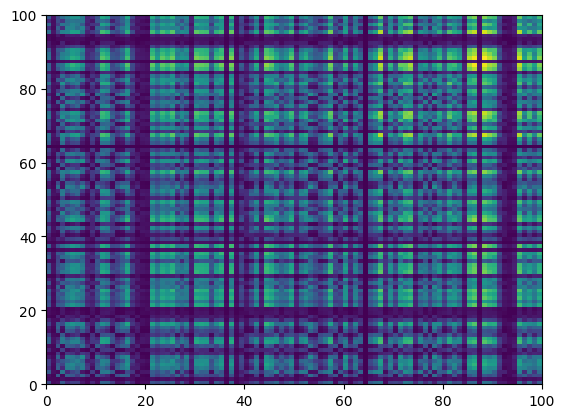

In [14]:
m=100
Xm=X[:, 0:100] 

C=np.matmul(Xm.T,Xm)
plt.pcolor(C)

We then used the correlation matrix, C, to compute which two images are the most and least correlated and graphed them. 

This is done by looping through each pair of data points in the matrix C and checking corresponding correlation values for each set of data points. If the correlation score between the current set of points is greater than the previous max, the code updates the maximum score and records the row and column of the points with the max score

At the end of the loops, the code should have found the pair of variables with the highest correlation score, which can be accessed through the variables score_max, r_max, and c_max.


86
88


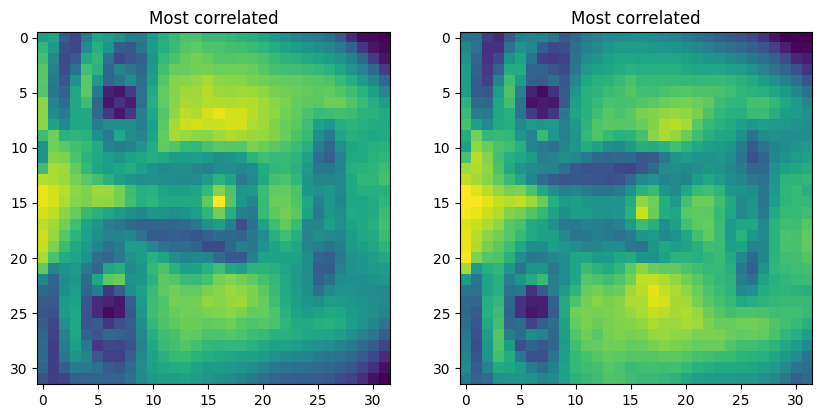

In [15]:
score_max=0
for j in range(99):
    for jj in range((j+1),100):
        if ( C[j,jj]>score_max ):
            score_max=C[j,jj]
            r_max=j
            c_max=jj
            
print(r_max)
print(c_max)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X[:, r_max].reshape((32, 32)).T)
axes[0].set_title('Most correlated')
axes[1].imshow(X[:, c_max].reshape((32, 32)).T)
axes[1].set_title('Most correlated')
plt.show()

A similar approach is used to compute the least correlated images

54
64


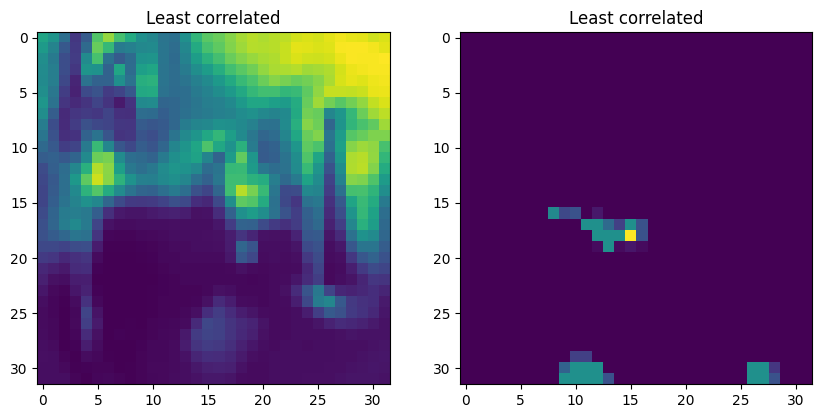

In [16]:
score_min = np.inf
for j in range(99):
    for jj in range((j+1), 100):
        if C[j, jj] < score_min:
            score_min = C[j, jj]
            r_min = j
            c_min = jj
            
print(r_min)
print(c_min)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X[:, r_min].reshape((32, 32)).T)
axes[0].set_title('Least correlated')
axes[1].imshow(X[:, c_min].reshape((32, 32)).T)
axes[1].set_title('Least correlated')
plt.show()

A similar approach is used to analyze a given set of images

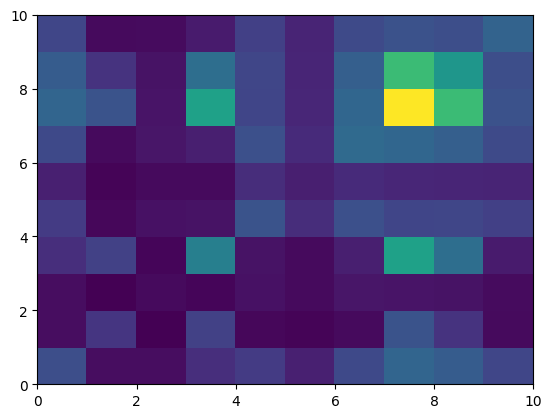

In [10]:
m=10
indices = [0,312,511,4,2399,112,1023,86,313,2004]
Xd=X[:, indices]
D=np.matmul(Xd.T,Xd)
plt.pcolor(D)

7
8


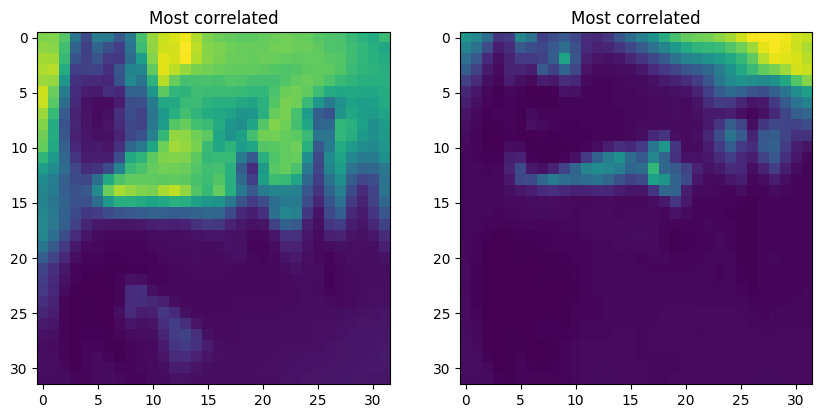

In [11]:
score_max=0
for j in range(10):
    for jj in range((j+1),9):
        if ( D[j,jj]>score_max ):
            score_max=D[j,jj]
            r_max=j
            c_max=jj
            
print(r_max)
print(c_max)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X[:, r_max].reshape((32, 32)).T)
axes[0].set_title('Most correlated')
axes[1].imshow(X[:, c_max].reshape((32, 32)).T)
axes[1].set_title('Most correlated')
plt.show()

1
2


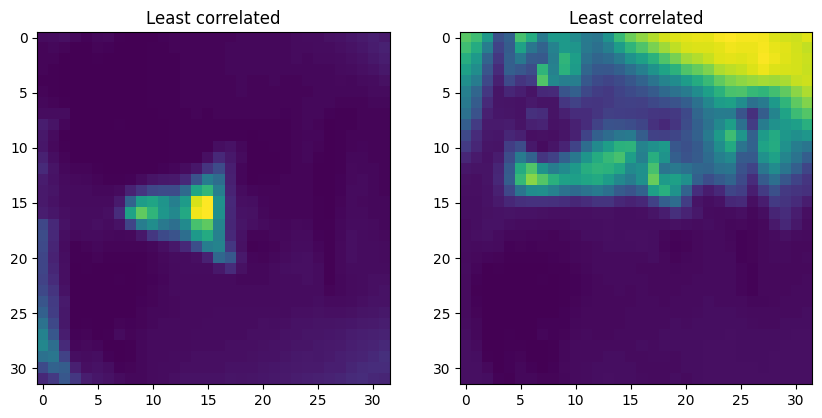

In [12]:
score_min = np.inf
for j in range(10):
    for jj in range((j+1), 9):
        if D[j, jj] < score_min:
            score_min = D[j, jj]
            r_min = j
            c_min = jj
            
print(r_min)
print(c_min)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X[:, r_min].reshape((32, 32)).T)
axes[0].set_title('Least correlated')
axes[1].imshow(X[:, c_min].reshape((32, 32)).T)
axes[1].set_title('Least correlated')
plt.show()

### Problems d,e,f,g : Compute the principal component directions two different ways, compare the methods, compute the percentage of variance captured by first 6 SVD modes, plot the first 6 SVD modes

As mentioned earlier, in SVD the principal component directions of the data - which are the directions in which the data varies most are calculated by finding the eigenevectors of the covariance matrix. 
The first principal component direction corresponds to the eignvector with the largest eigenvalue and so on and so forth. The important thing to remember is that these eigenvalues represent the directions of max variance within the data. 

Similarly, we will be first creating a matrix Y by multiplying X with its transpose X^T. Y will be a symmetric and semi-definite matrix - which means that the matrix has real eigenvalues with orthogonal eigenvectors.

This is relevant, since the eigenvectors of Y are equivalent to the right singular vectors of X, which are contained in the V matrix found by calculating the SVD of X

Hence, we calculate the eigenvectors of Y and select the top six with the largest magnitude which would correspond to the first 6 principal component directions of X

In [20]:
# create Y = XX^T
Y = np.matmul(X, X.T)

# compute the eigenvalues and eigenvectors of Y
eigvals, eigvecs = np.linalg.eig(Y)

# find the indices that would sort the eigenvalues in decreasing order
idx = np.argsort(eigvals)[::-1]

# extract the first six eigenvectors with the largest magnitude eigenvalue
eigvecs_top6 = eigvecs[:, idx[:6]]

v1 = eigvecs_top6[:,0]

Here, we compute the SVD of X using **np.linalg.svd**

We obtained the left singular vectors of X using the U matrix. These left singular vectors are equivalent to the right singular vectors of X (which were originally contained in the V matrix of the SVD) - hence we are able to get the first 6 principal component directions by using the U matrix instead of the V matrix, as SVD provides a more stable way of computing them

In [25]:
U, S, Vt = np.linalg.svd(X, full_matrices=False)

u1 = U[:, 0]
u2 = U[:, 1]
u3 = U[:, 2]
u4 = U[:, 3]
u5 = U[:, 4]
u6 = U[:, 5]


We then compute the norm of difference between the first principal component vectors calculated by each method

In [29]:
# compare v1 with u1 & compute norm of difference of their absolute values 
diff_norm = np.linalg.norm(np.abs(v1) - np.abs(u1))
print("Norm of difference between absolute values of v1 and u1 is : ", diff_norm)

Norm of difference between absolute values of v1 and u1 is :  1.7239180576197145e-15


Finally, we compute the percent of variance capture by each Principal component direciton or 'Mode' by using the formula, and plot the modes to better understand and visualize the underlying relationships and structure within the data

Mode 1: 72.93%
Mode 2: 15.28%
Mode 3: 2.57%
Mode 4: 1.88%
Mode 5: 0.64%
Mode 6: 0.59%


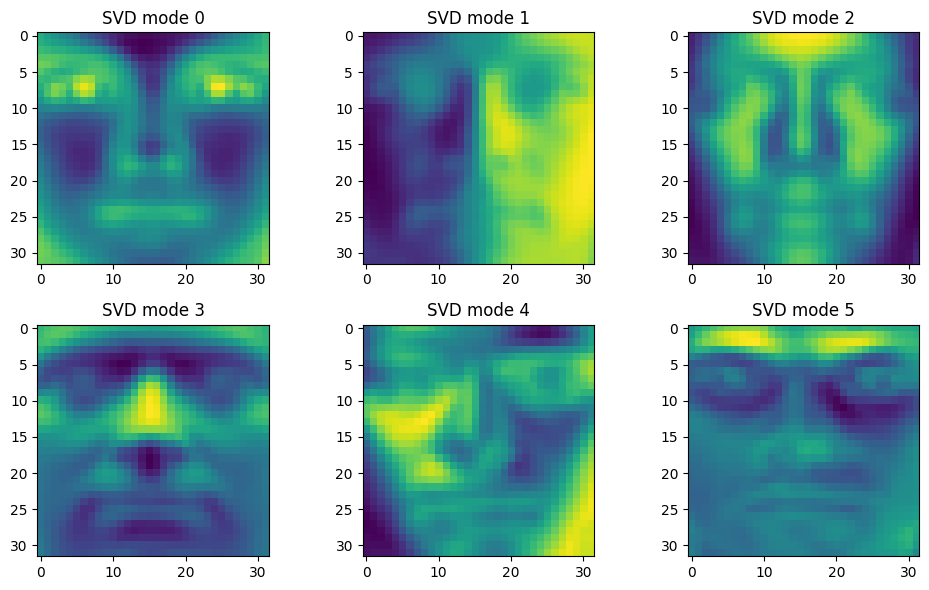

In [53]:
# Compute the percentage of variance captured by each mode
variance_percent = (S ** 2 / np.sum(S ** 2)) * 100

# Print the percentage of variance captured by each mode
for i in range(6):
    print("Mode {}: {:.2f}%".format(i+1, variance_percent[i]))


# Plot the first six SVD modes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for i in np.arange(6):
    plt.subplot(2,3,i+1)
    plt.imshow(U[:,i].reshape(32,32))
    plt.title('SVD mode ' + str(i))

plt.tight_layout()
plt.show()
    

## 4. Results & Conclusion

## 4. Results & Conclusion

**problem a** : Correlation Matrix for first 100 images

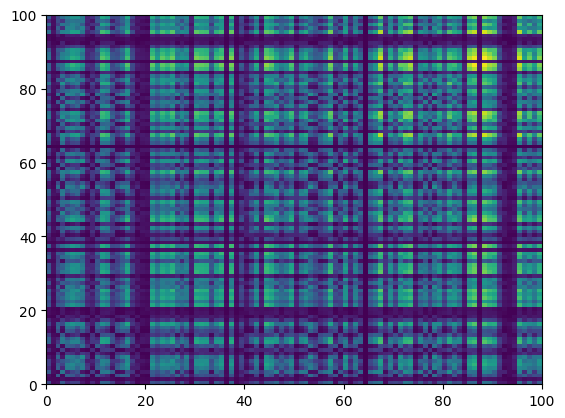

**problem b** : 

Most Correlated Images

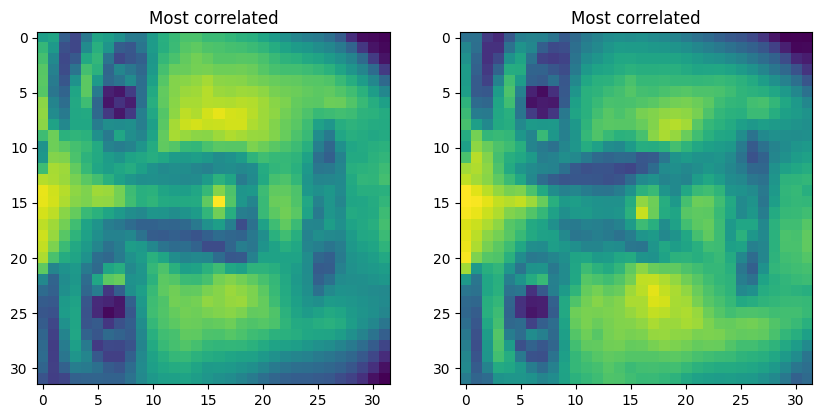

Least Correlated Images

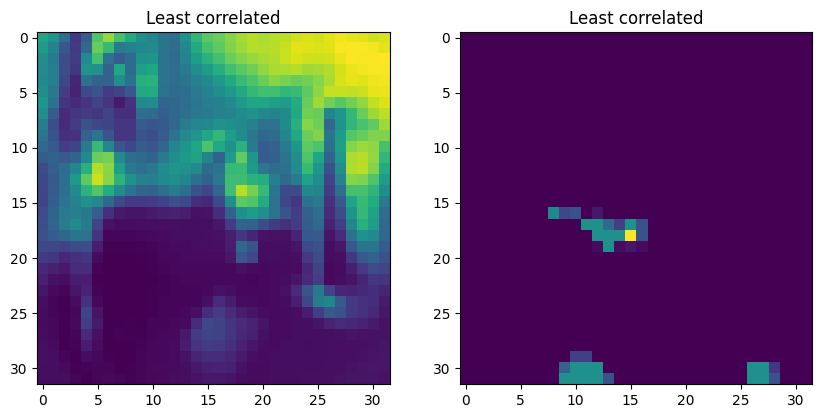

**problem c**: 

Corrleation Matrix for given set of 10 images

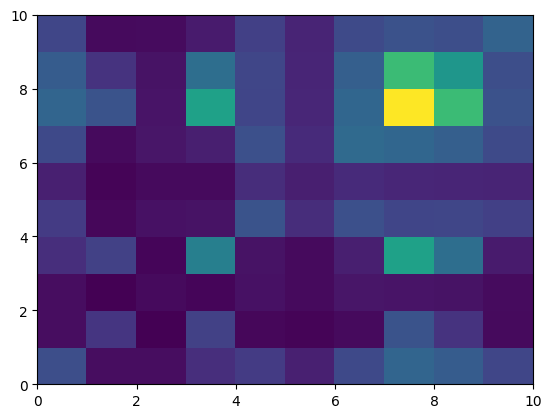

Most Correlated 

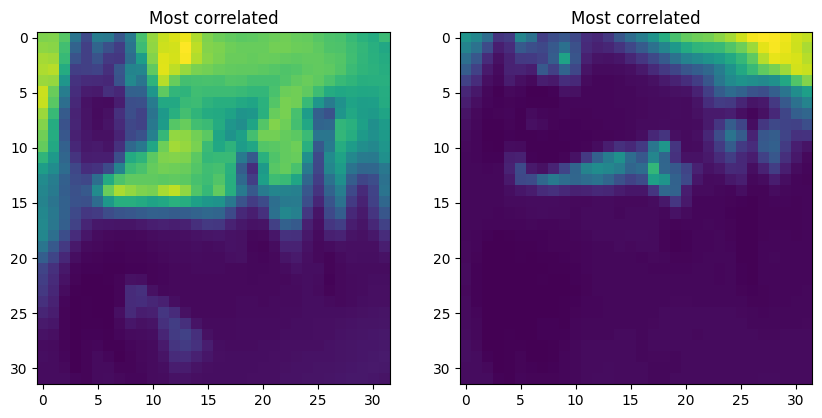

Least Correlated 

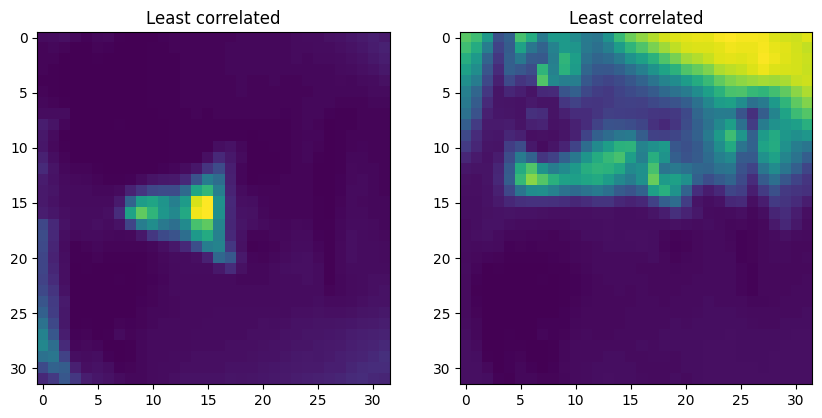

**problem f**: Norm of difference between absolute values of v1 and u1 is :  1.7239180576197145e-15


**problem g**:

Variance captured by each of the first 6 SVD modes

Mode 1: 72.93%

Mode 2: 15.28%

Mode 3: 2.57%

Mode 4: 1.88%

Mode 5: 0.64%

Mode 6: 0.59%


Plots of first 6 SVD modes

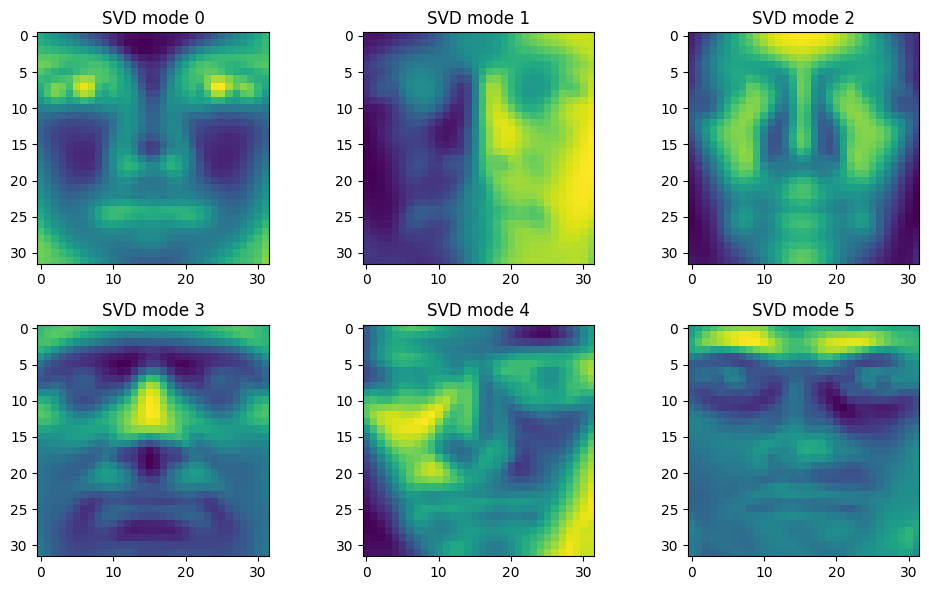
